In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from gb import GrangerBusca,simulate,gbio

### Reading Data

In [2]:
#ticks.dat contains a sample of the memetracker dataset, the fitting method accepts a list of lists of ordered timestamps
timestamps=[]
with open('ticks.dat') as data:
    for l in data:
        timestamps.append([float(x) for x in l.split()[1:]])
        print (len(timestamps[-1]))


71304
4203
26059
33148
5636
8835
50130
20153
8053
42117
40
7772
8335
18228
49318
6094
10413
8002
9976
27665
24914
16013
11222
3558
8803
12162
25084
18144
23229
53187
8872
8183
3100
27446
59104
51582
59575
10989
28702
4324
11672
28670
4304
41259
65
401
334
70
26
1213
577
29
34
496
47
1
16
4
21
19
2
2
1
1
1
1
2
4
23


### Fitting Data

In [3]:
granger_model = GrangerBusca(alpha_prior=1.0/len(timestamps), num_iter=300, metropolis=True, beta_strategy=1) #recommended parameters

granger_model.fit(timestamps)

{0: 120699, 1: 119701, 2: 119706, 3: 119700, 4: 121052, 5: 121076, 6: 121335, 7: 119700}
{0: array([ 0, 26, 40, 12, 42], dtype=uint64), 1: array([36,  2, 21, 30,  8, 50, 53, 51, 58, 57, 64, 55], dtype=uint64), 2: array([34, 33, 25, 22, 31, 49, 46, 48, 56], dtype=uint64), 3: array([29, 19,  7, 16, 17, 47, 44, 54, 10, 52, 59, 66, 60, 63],
      dtype=uint64), 4: array([35, 41, 28,  5,  4, 32], dtype=uint64), 5: array([ 6, 38, 20, 24, 39,  1], dtype=uint64), 6: array([14,  3, 13, 37, 15, 23], dtype=uint64), 7: array([ 9, 43, 27, 18, 11, 45, 68, 67, 61, 65, 62], dtype=uint64)}


In [4]:
print (granger_model.mu_)
print (granger_model.Alpha_)
print (granger_model.beta_)
sim = simulate.GrangeBuscaSimulator(granger_model.mu_, granger_model.Alpha_.toarray())


[7.25738453e-03 4.90736048e-04 9.16826420e-04 4.58425445e-04
 7.08156543e-04 4.33050860e-04 4.82124217e-04 2.42602238e-03
 5.22542201e-04 8.38770152e-04 0.00000000e+00 8.51582964e-04
 2.60416569e-04 4.58120808e-04 4.90020135e-04 5.22792677e-04
 6.90415516e-04 4.52728868e-04 4.11417605e-04 4.43572828e-04
 4.75178995e-04 1.48348215e-03 4.34898595e-04 4.29061571e-04
 2.62008799e-04 3.56068008e-04 7.04144548e-04 4.63531301e-04
 2.85519313e-04 5.32295388e-04 3.90589667e-04 3.85841847e-04
 4.41191688e-04 4.60445249e-04 5.04200110e-04 4.90157224e-04
 5.10335032e-04 3.78844204e-04 6.11548265e-04 3.97641359e-04
 4.58454865e-04 2.33941731e-04 3.07171672e-04 4.42149821e-04
 0.00000000e+00 5.26238079e-05 3.24041599e-05 0.00000000e+00
 0.00000000e+00 1.09433302e-04 7.47157009e-05 0.00000000e+00
 0.00000000e+00 4.87514487e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.08525568e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

### Saving and loading the model

In [5]:
gbio.save_model('example_model.npz',granger_model)
loaded_model=gbio.load_model('example_model.npz')

### Extracting the normalized Granger Matrix and the Exogeneous rates vector

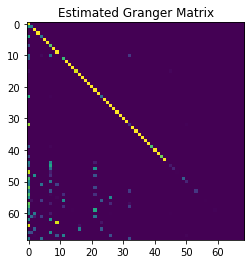

Exogeneous rates vector
[7.25738453e-03 4.90736048e-04 9.16826420e-04 4.58425445e-04
 7.08156543e-04 4.33050860e-04 4.82124217e-04 2.42602238e-03
 5.22542201e-04 8.38770152e-04 0.00000000e+00 8.51582964e-04
 2.60416569e-04 4.58120808e-04 4.90020135e-04 5.22792677e-04
 6.90415516e-04 4.52728868e-04 4.11417605e-04 4.43572828e-04
 4.75178995e-04 1.48348215e-03 4.34898595e-04 4.29061571e-04
 2.62008799e-04 3.56068008e-04 7.04144548e-04 4.63531301e-04
 2.85519313e-04 5.32295388e-04 3.90589667e-04 3.85841847e-04
 4.41191688e-04 4.60445249e-04 5.04200110e-04 4.90157224e-04
 5.10335032e-04 3.78844204e-04 6.11548265e-04 3.97641359e-04
 4.58454865e-04 2.33941731e-04 3.07171672e-04 4.42149821e-04
 0.00000000e+00 5.26238079e-05 3.24041599e-05 0.00000000e+00
 0.00000000e+00 1.09433302e-04 7.47157009e-05 0.00000000e+00
 0.00000000e+00 4.87514487e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.08525568e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


In [6]:
G=preprocessing.normalize(granger_model.Alpha_.toarray(),"l1")
mu=granger_model.mu_
plt.imshow(G)
plt.title('Estimated Granger Matrix')
plt.show()
print('Exogeneous rates vector')
print(mu)

### Simulating a Granger-Busca process

In [7]:
T_sim=150
sim_timestamps = sim.simulate(T_sim)

034287
current t 149.95478146952993
current t 149.95479469827626
current t 149.95480458812983
current t 149.95490203371955
current t 149.9550348326398
current t 149.95504302237788
current t 149.955131662416
current t 149.95518392929898
current t 149.9552828379731
current t 149.95529483301465
current t 149.9553367759961
current t 149.95550446521986
current t 149.95552109920612
current t 149.9556546973744
current t 149.9556591760001
current t 149.95568075198153
current t 149.95576057080748
current t 149.95577265914926
current t 149.95588083715856
current t 149.9559239274069
current t 149.9559543525606
current t 149.95611295489198
current t 149.9561481510363
current t 149.95618134209766
current t 149.956210263571
current t 149.95623448500345
current t 149.956324054591
current t 149.95645701341275
current t 149.95645745897514
current t 149.9566599056988
current t 149.95668434481593
current t 149.95688414367527
current t 149.95690360152975
current t 149.95713593625678
current t 149.95713727

In [8]:
len(sim_timestamps[0])

79134

In [9]:
G_sim=np.ones((5,5)) / 5
Beta_sim=np.ones((5,5))
mu_sim=0.01*np.ones((5))

#T_sim=1000
#sim = simulate.GrangeBuscaSimulator(mu_sim, G_sim,Beta_sim)
#sim_timestamps = sim.simulate(T_sim)

79134
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


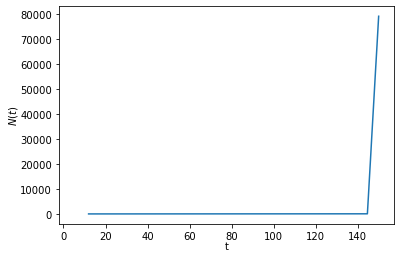

In [10]:
counting = [np.arange(len(sim_timestamps[i])) for i in range(len(sim_timestamps))]
for i in range(len(sim_timestamps)):
    print (len(sim_timestamps[i]))
    plt.plot(sim_timestamps[i], counting[i], label='%d' % i)
# plt.legend()
plt.ylabel('$N(t)$' , labelpad=0)
plt.xlabel('t' , labelpad=0)
plt.show()